In [29]:
import pandas as pd
import os
import sys

In [30]:
sys.path.append(os.path.abspath('../../'))

In [31]:
from analysis.preprocessing import load_and_clean_oceanwarning_data

In [32]:
df = load_and_clean_oceanwarning_data()
df

,Year,"Change in World Ocean Heat Content (ZJ, relative to 1957, 5-year running average)","Standard Error of World Ocean Heat Content (ZJ, ±se, 5-year running average)","Change in Northern Hemisphere Ocean Heat Content (ZJ, relative to 1957, 5-year running average)",Standard error for the Northern Hemisphere OHC in ZJ,"Change in Southern Hemisphere Ocean Heat Content (ZJ, relative to 1957, 5-year running average)",Standard error for the Southern Hemisphere OHC in ZJ
0,1957,0.00,20.25,0.00,9.25,0.00,11.00
1,1958,12.44,20.17,8.28,8.51,4.15,11.66
2,1959,5.90,20.36,6.44,8.24,0.00,12.12
3,1960,38.24,18.93,15.62,7.46,22.61,11.48
4,1961,45.41,17.73,12.13,7.11,33.27,10.61
...,...,...,...,...,...,...,...
59,2016,311.82,1.84,128.03,0.79,183.78,1.04
60,2017,314.50,1.90,127.48,0.88,187.01,1.02
61,2018,325.97,2.11,140.32,0.85,185.64,1.25
62,2019,337.45,1.79,145.93,0.85,191.52,0.94


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration pour des graphiques plus beaux
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

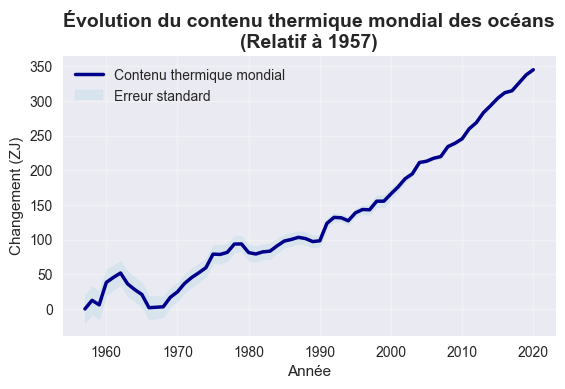

In [34]:
plt.figure(figsize=(14, 8))

# Graphique principal
plt.subplot(2, 2, 1)
plt.plot(df['Year'], df['Change in World Ocean Heat Content (ZJ, relative to 1957, 5-year running average)'],
         linewidth=2.5, color='darkblue', label='Contenu thermique mondial')
plt.fill_between(df['Year'],
                 df['Change in World Ocean Heat Content (ZJ, relative to 1957, 5-year running average)'] - df['Standard Error of World Ocean Heat Content (ZJ, ±se, 5-year running average)'],
                 df['Change in World Ocean Heat Content (ZJ, relative to 1957, 5-year running average)'] + df['Standard Error of World Ocean Heat Content (ZJ, ±se, 5-year running average)'],
                 alpha=0.3, color='lightblue', label='Erreur standard')
plt.title('Évolution du contenu thermique mondial des océans\n(Relatif à 1957)', fontsize=14, fontweight='bold')
plt.xlabel('Année')
plt.ylabel('Changement (ZJ)')
plt.legend()
plt.grid(True, alpha=0.3)

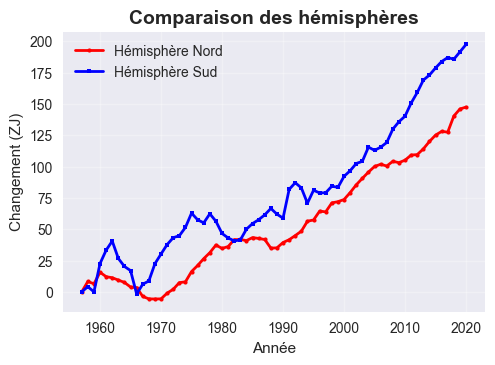

In [35]:
plt.subplot(2, 2, 2)
plt.plot(df['Year'], df['Change in Northern Hemisphere Ocean Heat Content (ZJ, relative to 1957, 5-year running average)'],
         linewidth=2, color='red', label='Hémisphère Nord', marker='o', markersize=3)
plt.plot(df['Year'], df['Change in Southern Hemisphere Ocean Heat Content (ZJ, relative to 1957, 5-year running average)'],
         linewidth=2, color='blue', label='Hémisphère Sud', marker='s', markersize=3)
plt.title('Comparaison des hémisphères', fontsize=14, fontweight='bold')
plt.xlabel('Année')
plt.ylabel('Changement (ZJ)')
plt.legend()
plt.grid(True, alpha=0.3)

C:\Users\julie\AppData\Local\Temp\ipykernel_7424\2731486394.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=labels, patch_artist=True)


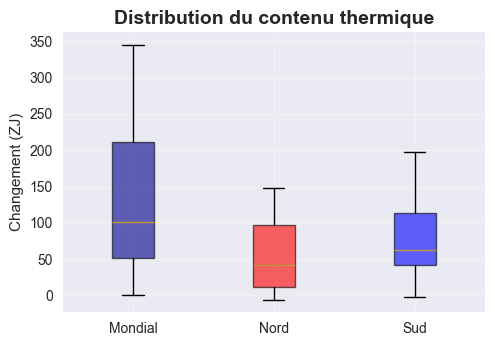

In [36]:
plt.subplot(2, 2, 3)
data_to_plot = [df['Change in World Ocean Heat Content (ZJ, relative to 1957, 5-year running average)'],
                df['Change in Northern Hemisphere Ocean Heat Content (ZJ, relative to 1957, 5-year running average)'],
                df['Change in Southern Hemisphere Ocean Heat Content (ZJ, relative to 1957, 5-year running average)']]
labels = ['Mondial', 'Nord', 'Sud']
colors = ['darkblue', 'red', 'blue']

plt.boxplot(data_to_plot, labels=labels, patch_artist=True)
for patch, color in zip(plt.gca().patches, colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)
plt.title('Distribution du contenu thermique', fontsize=14, fontweight='bold')
plt.ylabel('Changement (ZJ)')
plt.grid(True, alpha=0.3)
